In [6]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder

import random

In [7]:
def find_path(matrix, start_xy, end_xy):
    grid = Grid(matrix=matrix)
    start = grid.node(start_xy[0], start_xy[1])
    end = grid.node(end_xy[0], end_xy[1])
    finder = AStarFinder(diagonal_movement=DiagonalMovement.never)
    path, runs = finder.find_path(start, end, grid)
#     print(path)
#     print(grid.grid_str(path=path, start=start, end=end))
    return path

matrix = [
  [1, 1, 1],
  [1, 0, 0],
  [1, 1, 1]
]


find_path(matrix, [0, 0], [2, 2])

# finder = AStarFinder(diagonal_movement=DiagonalMovement.always)
# path, runs = finder.find_path(start, end, grid)

# print('operations:', runs, 'path length:', len(path))
# print(grid.grid_str(path=path, start=start, end=end))

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]

In [8]:
WIDTH = 16
HEIGHT = 16
GOALS = [[1, 1], [WIDTH // 2, HEIGHT - 2], [WIDTH - 1, 1]]

CENTER = [WIDTH // 2, HEIGHT // 2]
CENTER_RAD = 3
TOWER_RANGE = 2
BLOCK_PENALTY = -1

In [9]:
def generate_random_matrix(barrier_density):
    mat = [[1 if random.random() > barrier_density else 0 for i in range(WIDTH)] for j in range(HEIGHT)]
    for goal in GOALS:
        mat[goal[0]][goal[1]] = 1
    return mat

random.seed(1234)
test_matrix = generate_random_matrix(0.2)
test_matrix

[[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
 [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]]

In [10]:
def get_paths(matrix):
    path = []
    for i in range(len(GOALS) - 1):
        start = GOALS[i]
        end = GOALS[i + 1]
        subpath = find_path(matrix, start, end)
        if len(subpath) == 0:
            return None
        if i > 0:
            subpath = subpath[1:]
        path += subpath
    return path

test_path = get_paths(test_matrix)
# print(grid.grid_str(path=path, start=start, end=end))
test_path

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 5),
 (3, 5),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 7),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 9),
 (7, 10),
 (7, 11),
 (8, 11),
 (8, 12),
 (8, 13),
 (8, 14),
 (8, 13),
 (8, 12),
 (9, 12),
 (9, 11),
 (9, 10),
 (9, 9),
 (9, 8),
 (9, 7),
 (10, 7),
 (11, 7),
 (12, 7),
 (13, 7),
 (13, 6),
 (13, 5),
 (14, 5),
 (14, 4),
 (14, 3),
 (15, 3),
 (15, 2),
 (15, 1)]

In [11]:
def visualize_path(matrix, path, start_xy, end_xy):
    if path is None:
        path = []
    grid = Grid(matrix=matrix)
    start = grid.node(start_xy[0], start_xy[1])
    end = grid.node(end_xy[0], end_xy[1])
    print(grid.grid_str(path=path, start=start, end=end))
    
visualize_path(test_matrix, test_path, GOALS[0], GOALS[len(GOALS) - 1])

+----------------+
|  #    #  #    #|
|#s#  #   #     e|
| x  # ##  # # #x|
| x# #  ## # # xx|
| x        ## #x |
| xxxx  #  #  xx#|
| # #x#    # #x  |
|    xxx #xxxxx  |
| #   #x# x #    |
|      xx x#    #|
|    #  x#x#     |
|       xxx   #  |
|##      xx  #   |
|        x ###   |
|    #   x       |
|#   #  #  #     |
+----------------+


In [12]:
import math

def get_damage(matrix, i, j):
    damage = 0
    [cx, cy] = CENTER
    for ox in range(-CENTER_RAD, CENTER_RAD + 1):
        for oy in range(-CENTER_RAD, CENTER_RAD + 1):
            x = cx + ox
            y = cy + oy
            if matrix[y][x] == 1:
                continue
            if x == i and y == j:
                return 0
            dis = math.sqrt((x - i) ** 2 + (y - j) ** 2)
            if dis <= TOWER_RANGE:
                damage += 1
    return damage
    

def get_damage_matrix(matrix):
    return [[get_damage(matrix, i, j) for i in range(WIDTH)] for j in range(HEIGHT)]

get_damage_matrix(test_matrix)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 2, 4, 3, 3, 0, 3, 1, 0, 0, 0],
 [0, 0, 0, 0, 2, 2, 4, 3, 0, 2, 5, 2, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 2, 0, 3, 4, 4, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 1, 1, 2, 2, 4, 3, 0, 3, 2, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 2, 0, 3, 0, 3, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [13]:
def score_matrix(matrix):
    path = get_paths(matrix)
    if path is None:
        return BLOCK_PENALTY
    damage = get_damage_matrix(matrix)
    score = 0
    for (x, y) in path:
        score += damage[y][x]
    return score
    
score_matrix(test_matrix)

44

In [14]:
random.seed(1234)
test_scores = [score_matrix(generate_random_matrix(0.2)) for i in range(20)]
test_scores

[44, 8, 19, -1, -1, -1, 11, 13, 31, 7, -1, 47, 10, -1, 18, 30, 20, 17, 38, 39]

In [17]:
import numpy as np

random.seed(1234)
[(density/20, np.mean([score_matrix(generate_random_matrix(density/20)) for i in range(500)])) for density in range(1, 20)]

[(0.05, 5.458),
 (0.1, 9.744),
 (0.15, 13.624),
 (0.2, 15.64),
 (0.25, 15.61),
 (0.3, 9.426),
 (0.35, 5.452),
 (0.4, 0.99),
 (0.45, -0.434),
 (0.5, -1.0),
 (0.55, -1.0),
 (0.6, -1.0),
 (0.65, -1.0),
 (0.7, -1.0),
 (0.75, -1.0),
 (0.8, -1.0),
 (0.85, -1.0),
 (0.9, -1.0),
 (0.95, -1.0)]

In [18]:
best = 0.2
random.seed(1234)
test_scores_best = [score_matrix(generate_random_matrix(best)) for i in range(2000)]

(array([871., 155., 294., 267., 197., 130.,  61.,  19.,   3.,   3.]),
 array([-1. ,  6.8, 14.6, 22.4, 30.2, 38. , 45.8, 53.6, 61.4, 69.2, 77. ]),
 <BarContainer object of 10 artists>)

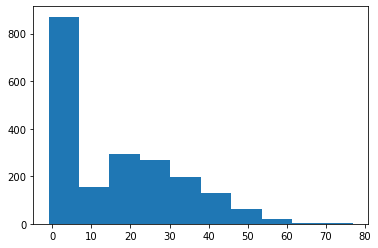

In [19]:
import matplotlib.pyplot as plt
plt.hist(test_scores_best)

In [20]:
random.seed(1234)
matrix_corpus = [generate_random_matrix(best) for i in range(10000)]
matrix_scores = [score_matrix(m) for m in matrix_corpus]

In [21]:
print(np.max(matrix_scores))
best_mat = matrix_corpus[np.argmax(matrix_scores)]
visualize_path(best_mat, get_paths(best_mat), GOALS[0], GOALS[len(GOALS) - 1])

79
+----------------+
| # ##           |
| s       # #xxxe|
| x          x   |
| x ##  ##   x   |
| x       #  x   |
| xxxx #     x  #|
|    xxxx   #x   |
|       x ##xx # |
|###  ##xxxxx #  |
|#       ##x     |
|   # ## #xx#    |
|  # #  #xx#    #|
|  # #   xx #    |
|#  #    xx ##  #|
|   # #  xx      |
|    #    ##     |
+----------------+


In [22]:
random.seed(4321)
matrix_test_X = [generate_random_matrix(best) for i in range(2000)]
matrix_test_y = [score_matrix(m) for m in matrix_test_X]

In [16]:
def get_collision_array(matrix, x, y):
    if x < 0 or y < 0 or x >= WIDTH or y >= HEIGHT:
        return 0
    return matrix[y][x]

def generate_collision_tensor(matrix):
    return [[[ \
        get_collision_array(matrix, x-1, y), \
        get_collision_array(matrix, x+1, y), \
        get_collision_array(matrix, x, y-1), \
        get_collision_array(matrix, x, y+1) \
    ] for x in range(WIDTH)] for y in range(HEIGHT)]
            
test_collision = generate_collision_tensor(test_matrix)

print(test_collision[0][0])
print(test_collision[1][1])
print(test_collision[2][2])
print(test_collision[3][3])


test_matrix

[0, 1, 0, 0]
[0, 0, 1, 1]
[1, 1, 0, 0]
[0, 0, 1, 1]


[[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
 [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]]

In [23]:
matrix_train_col_X = [generate_collision_tensor(m) for m in matrix_corpus]
matrix_test_col_X = [generate_collision_tensor(m) for m in matrix_test_X]

In [25]:
file = open('train_X.data', 'wb')
np.save(file, np.array(matrix_corpus))
file.close()

file = open('train_Y.data', 'wb')
np.save(file, np.array(matrix_scores))
file.close()

file = open('test_X.data', 'wb')
np.save(file, np.array(matrix_test_X))
file.close()

file = open('test_Y.data', 'wb')
np.save(file, np.array(matrix_test_y))
file.close()

file = open('train_col_X.data', 'wb')
np.save(file, np.array(matrix_train_col_X))
file.close()

file = open('test_col_X.data', 'wb')
np.save(file, np.array(matrix_test_col_X))
file.close()
